Do not take a short position
Consider taking a short position
Current Streak: 5
Probability of Next Streak: 2.6 %


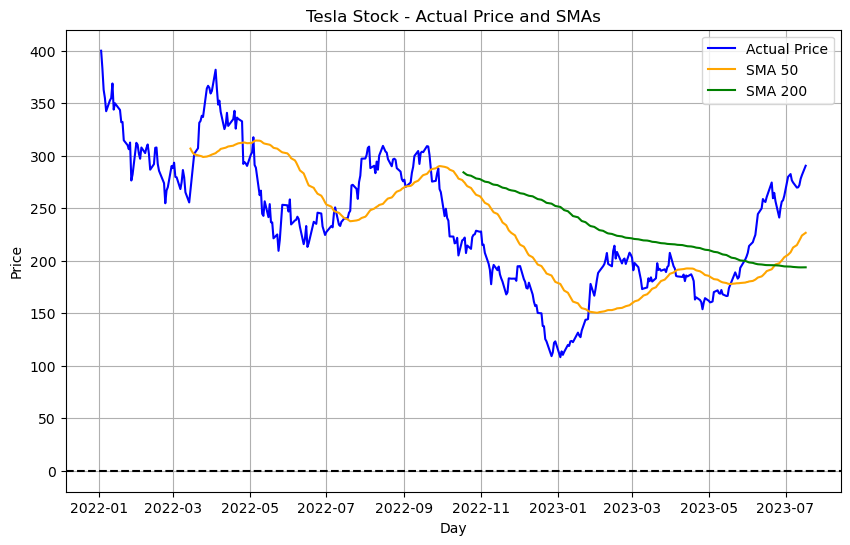

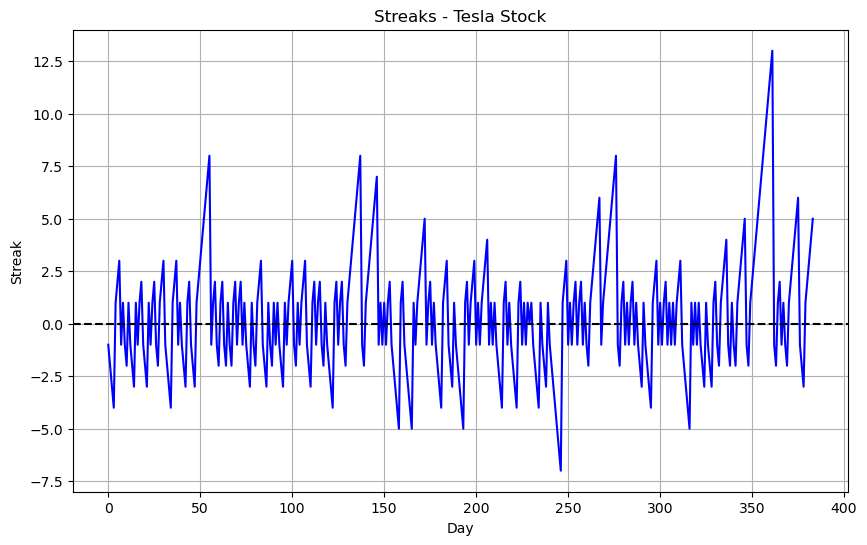

In [38]:
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

def calculate_streaks(prices):
    streaks = []
    current_streak = 0

    for i in range(1, len(prices)):
        if prices[i] > prices[i - 1]:
            current_streak = current_streak + 1 if current_streak >= 0 else 1
        elif prices[i] < prices[i - 1]:
            current_streak = current_streak - 1 if current_streak <= 0 else -1
        else:
            current_streak = 0

        streaks.append(current_streak)

    return streaks, current_streak

# Define the ticker symbol and time range for Tesla
ticker_symbol = "TSLA"
start_date = "2022-01-01"
end_date = datetime.datetime.today().strftime('%Y-%m-%d')

# Fetch historical price data from Yahoo Finance
data = yf.download(ticker_symbol, start=start_date, end=end_date, progress=False)

# Extract the 'Close' prices from the fetched data
tesla_prices = data['Close']

# Calculate the 50-day and 200-day Simple Moving Averages
sma_50 = tesla_prices.rolling(window=50).mean()
sma_200 = tesla_prices.rolling(window=200).mean()

streaks, current_streak = calculate_streaks(tesla_prices)

# Check conditions for long position
if sma_50[-1] > sma_200[-1] and max(streaks) <= -4:
    print("Consider taking a short position")
elif max(streaks) < -5:
    print("Consider taking a long position")
else:
    print("Do not take a short position")


# Check conditions for short position
if sma_50[-1] < sma_200[-1] and max(streaks) >= 4:
    print("Consider taking a long position")
elif max(streaks) > 5:
    print("Consider taking a short position")
else:
    print("Do not take a long position")


# Calculate the probability of the next streak and round it to a percentage
print("Current Streak:", current_streak)
next_streak_probability = round((sum(np.array(streaks) == current_streak) / len(streaks)) * 100, 2)
print("Probability of Next Streak:", next_streak_probability, "%")

# Plotting the actual prices and SMAs
plt.figure(figsize=(10, 6))
plt.plot(tesla_prices, color='blue', label='Actual Price')
plt.plot(sma_50, color='orange', label='SMA 50')
plt.plot(sma_200, color='green', label='SMA 200')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Tesla Stock - Actual Price and SMAs')
plt.grid(True)
plt.legend()
plt.show()

# Plotting the streaks
plt.figure(figsize=(10, 6))
plt.plot(streaks, color='blue')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Day')
plt.ylabel('Streak')
plt.title('Streaks - Tesla Stock')
plt.grid(True)
plt.show()


: 